<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/Hira_LS_DS_123_Reshape_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
sns.catplot(x='trt', y='result', col='name', kind='bar', data=tidy)

NameError: ignored

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame( #saving a list of list
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T #tranposes the dataframe so whatever is in the columns is in the rows now.

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [0]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [2]:
table1.index #gives names of people

table1.columns.tolist() #names of columns

['treatmenta', 'treatmentb']

In [0]:
tidy = table1.reset_index().melt(id_vars='index') #id_vars function, we will use the index column

#id_vars

tidy =tidy.rename(columns={'index': 'name', 'variable': 'trt',
                           'value': 'result'})
                            
#
                            

In [4]:
tidy['trt'] = tidy['trt'].str.replace('treatment', '') 
tidy.set_index('name')

,trt,result
name,,
John Smith,a,NaN
Jane Doe,a,16.0
Mary Johnson,a,3.0
John Smith,b,2.0
Jane Doe,b,11.0
Mary Johnson,b,1.0


In [5]:
(tidy['trt'] == 'b').astype(int)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

**extra challenge**

what if we wanted to change a and b to 0 and 1

In [6]:
tidy['trt'].replace('a', 0).replace('b',1)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [7]:
tidy['trt'].map({'a':0, 'b':1})

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [8]:
tidy['trt'].apply(lambda x: ord(x)) #converts the characters, a and b into 97 and 98

0    97
1    97
2    97
3    98
4    98
5    98
Name: trt, dtype: int64

## Table 2 --> Tidy

In [9]:
table2.index
table2.columns.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [0]:
tidy2 = table2.reset_index().melt(id_vars='index')

In [11]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [12]:
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
 #id_vars function, we will use the index column

#id_vars

tidy_re =tidy2.rename(columns={'index': 'trt', 'variable': 'name',
                           'value': 'result'})
                            
#

In [14]:
tidy_re

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
tidy2['trt'] = tidy2['trt'].str.replace('treatment', ' ') 
tidy2.set_index('name')

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [0]:
table1

In [0]:
tidy

In [17]:
#do a pivot table. multiple ways, it could either be pivot table or pivot table method

tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [23]:
tidy_re.pivot_table(index='name', columns='trt', values='result')

trt,treatmenta,treatmentb
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [0]:
 !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
 !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

Run these cells to load the data

In [0]:
%cd instacart_2017_05_01

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [0]:
products.columns.tolist() #prints the list of columns in products df


In [0]:
orders.columns.tolist() #prints the names of columns in orders df

**Challenge**
- what do we do to take the 2 columns, 1 from products, 1 from orders, we cannot directly join them.
- Order products has both product id and order id
- so we use order products to join the products and the orders dataframes.
- so we can take order hour of day and product id from orders dataframe and then take the products name

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']])
          )

merged

In [0]:
products.shape,order_products.shape, orders.shape, merged.shape

In [0]:
merged.head()

In [0]:
#one way to write this
condition = ((merged['product_name'] == 'Half Baked Frozen yogurt') |
             (merged['product_name'] =='Half And half Ultra Pasteurized'))


merged[condition]

#order_products['order_id'] == 2539329

In [0]:
#what if we had all 50 products to pull up??

condition2 = merged['product_name'].isin(product_names) #how come we didn't get all the names
#of all the products
subset = merged[condition2]

In [0]:
subset.shape, merged.shape #subset shows all the times just those products were ordered

In [0]:
subset.sample(n=10) #random different products

## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

In [0]:
froyo['order_hour_of_day'].value_counts() #just gives us the raw counts

In [0]:
froyo['order_hour_of_day'].value_counts().sort_index() #sorts it by the hour of day

In [0]:
(froyo['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())

(cream['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())


#normalize= How often was the product offered at any time i.e. at 10am or 4pm
#multiply it by 100 to have the % run from 1 to 100 instead of 0 to 1

### 2. crosstab

In [0]:
#to do crosstab of both products at the same time
pd.crosstab(subset['order_hour_of_day'],
           subset['product_name']).plot()
           #normalize='columns')
  
  #does the same thing but without percentages

pd.crosstab(subset['order_hour_of_day'],
           subset['product_name'],
           normalize='columns').plot()
  
  

### 3. pivot_table

In [0]:
subset.pivot_table(index ='order_hour_of_day',
                   columns='product_name',
                   values='order_id',
                   aggfunc=len).plot();

NameError: ignored

### 4. melt

In [0]:
table = pd.crosstab(subset['order_hour_of_day'],
                   subset['product_name'],
                   normalize=True)

table.reset_index().melt(id_vars='order_hour_of_day')


(table
.reset_index()
.melt(id_vars='order_hour_of_day')
.rename(columns={
    'order_hour_of_day': 'Hour of day Ordered',
    'product_name': 'Product',
    'value' : 'Percent of Orders by Product'
}))

sns.relplot(x='Hour of Day Ordered',
           y='Percent of Orders by Product',
           data=melted,
           kind='line');

#shows the order_hour_of_day

#separate row for when half and half was ordered at what time
#and then we are finished with 24 hours and then we have 
#froyo timing of when it was ordered for the 24 hours

# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [0]:
flights.head(12)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [0]:
#passengers
table = flights.pivot_table(index ='year',
                   columns='month',
                   values='passengers')

table

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


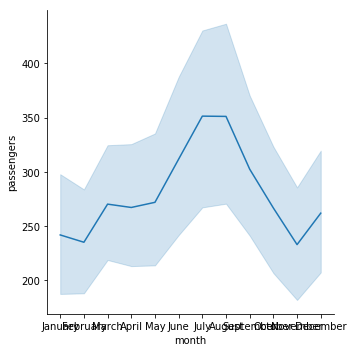

In [0]:
sns.relplot(x='month',
           y='passengers',
           data=flights,
           kind='line');

In [0]:
pvt2 = flights.pivot_table(index = 'month',
                   columns='year',
                   values='passengers')

pvt2

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [0]:
total = pvt2.value_counts()

total.head(30)

AttributeError: ignored

**TWO THINGS TO DO**)
- how to plot so that, we can plot all the numbers of passengers in 12 months into a plot.
then, how to plot so that we have # of passengers on the y-axis
 the month on the x-axis and a line plot showing how the number increased over the months.

In [0]:

total_pass = (flights['passengers'].value_counts())

total_pass = pd.DataFrame({'Number_of_passengers': total_pass.values, 'passengers': flights.index, })

ValueError: ignored

sns.relplot(x='Hour of Day Ordered',
           y='Percent of Orders by Product',
           data=melted,
           kind='line');

# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)